In [13]:
import numpy as np
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
import zipfile
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [14]:
# Load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

# Load a list of files and return as a 3D numpy array
def load_group(filenames, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    return np.dstack(loaded)

# Load a dataset group, such as train or test
def load_dataset_group(group, prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/UCI HAR Dataset/'):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    # Total acceleration
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    # Body acceleration
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    # Body gyroscope
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    # Load input data
    X = load_group(filenames, filepath)
    # Load class output
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

# Load the dataset, returns train and test X and y elements
def load_dataset(prefix='D:/가천대학교 3-2/딥러닝/human+activity+recognition+using+smartphones/'):
    # Load all train
    trainX, trainy = load_dataset_group('train', prefix + 'UCI HAR Dataset/')
    # Load all test
    testX, testy = load_dataset_group('test', prefix + 'UCI HAR Dataset/')
    # Zero-offset class values
    trainy = trainy - 1
    testy = testy - 1
    # One-hot encode y
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print("trainX shape: ", trainX.shape)
    print("trainy shape: ", trainy.shape)
    print("testX shape: ", testX.shape)
    print("testy shape: ", testy.shape)
    return trainX, trainy, testX, testy

In [15]:
# Load the dataset
trainX, trainy, testX, testy = load_dataset()

trainX shape:  (7352, 128, 9)
trainy shape:  (7352, 6)
testX shape:  (2947, 128, 9)
testy shape:  (2947, 6)


In [16]:
# BiLSTM
n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
model = Sequential()
model.add(Bidirectional(LSTM(100, input_shape=(n_timesteps, n_features))))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))

In [17]:
# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
# Fit the model
batch_size = 64
train_epochs = 10
history = model.fit(trainX, trainy, epochs=train_epochs, batch_size=batch_size, verbose=True, validation_split=0.2)

Epoch 1/10
92/92 [==============================] - 53s 527ms/step - loss: 1.1424 - accuracy: 0.5212 - val_loss: 0.8755 - val_accuracy: 0.6458
Epoch 2/10
92/92 [==============================] - 39s 423ms/step - loss: 0.8610 - accuracy: 0.6519 - val_loss: 0.8120 - val_accuracy: 0.7152
Epoch 3/10
92/92 [==============================] - 41s 451ms/step - loss: 0.6794 - accuracy: 0.7250 - val_loss: 0.7392 - val_accuracy: 0.7206
Epoch 4/10
92/92 [==============================] - 41s 448ms/step - loss: 0.5206 - accuracy: 0.8104 - val_loss: 0.6830 - val_accuracy: 0.7845
Epoch 5/10
92/92 [==============================] - 42s 455ms/step - loss: 0.4172 - accuracy: 0.8510 - val_loss: 0.5508 - val_accuracy: 0.8300
Epoch 6/10
92/92 [==============================] - 48s 516ms/step - loss: 0.3456 - accuracy: 0.8777 - val_loss: 0.5953 - val_accuracy: 0.8300
Epoch 7/10
92/92 [==============================] - 47s 516ms/step - loss: 0.2388 - accuracy: 0.9240 - val_loss: 0.4678 - val_accuracy: 0.8742

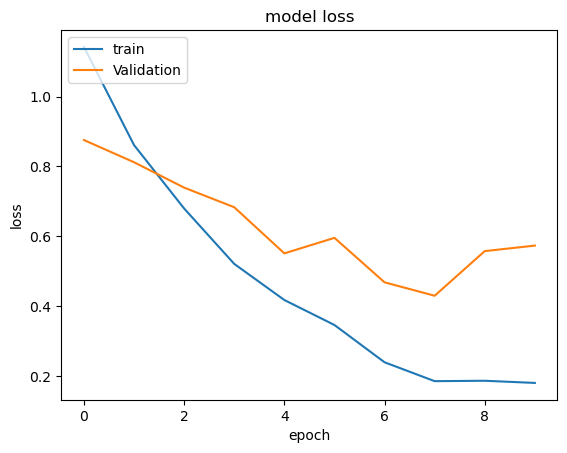

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [20]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
print("Accuracy of the BiLSTM model:", test_accuracy)
# Get the predictions for the test set
predictions = model.predict(testX)

Accuracy of the BiLSTM model: 0.8676620125770569
93/93 [==============================] - 5s 42ms/step


In [21]:
predictions

array([[4.1363042e-02, 3.2212071e-03, 1.2958031e-04, 6.0327891e-03,
        9.4924307e-01, 1.0287758e-05],
       [4.4944789e-02, 7.0704874e-03, 2.4185596e-04, 6.3930312e-03,
        9.4132435e-01, 2.5496949e-05],
       [4.1480321e-02, 6.5170606e-03, 2.1485430e-04, 5.6591481e-03,
        9.4610715e-01, 2.1442371e-05],
       ...,
       [2.6828135e-04, 9.9159086e-01, 9.0859080e-04, 1.2401962e-05,
        7.2096954e-03, 1.0120795e-05],
       [8.7009126e-04, 9.8688382e-01, 9.9194702e-04, 3.4518744e-05,
        1.1207328e-02, 1.2292201e-05],
       [3.0170663e-04, 9.9626547e-01, 7.5675122e-04, 1.0058402e-05,
        2.6602938e-03, 5.6713784e-06]], dtype=float32)

In [22]:
# Confusion Matrix
def display_results(testy,predictions,classNames):
    y_test=np.argmax(testy, axis=1)
    y_scores=np.argmax(predictions, axis=1)
    classes = len(classNames)
    cm = confusion_matrix(y_test, y_scores)
    print("**** Confusion Matrix ****")
    print(cm)
    print("**** Classification Report ****")
    print(classification_report(y_test, y_scores, target_names=classNames))
    con = np.zeros((classes,classes))
    for x in range(classes):
        for y in range(classes):
            con[x,y] = cm[x,y] #/np.sum(cm[x,:])

    plt.figure(figsize=(10,8))
    df = sns.heatmap(con, annot=True, fmt='g', cmap='Blues',xticklabels= classNames , yticklabels= classNames)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**** Confusion Matrix ****
[[400  19  49   7  21   0]
 [  1 415  49   1   4   1]
 [  0   2 416   2   0   0]
 [  0  21   0 418  52   0]
 [  1   1   0 124 406   0]
 [  0  35   0   0   0 502]]
**** Classification Report ****
              precision    recall  f1-score   support

           1       1.00      0.81      0.89       496
           2       0.84      0.88      0.86       471
           3       0.81      0.99      0.89       420
           4       0.76      0.85      0.80       491
           5       0.84      0.76      0.80       532
           6       1.00      0.93      0.97       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.88      0.87      0.87      2947



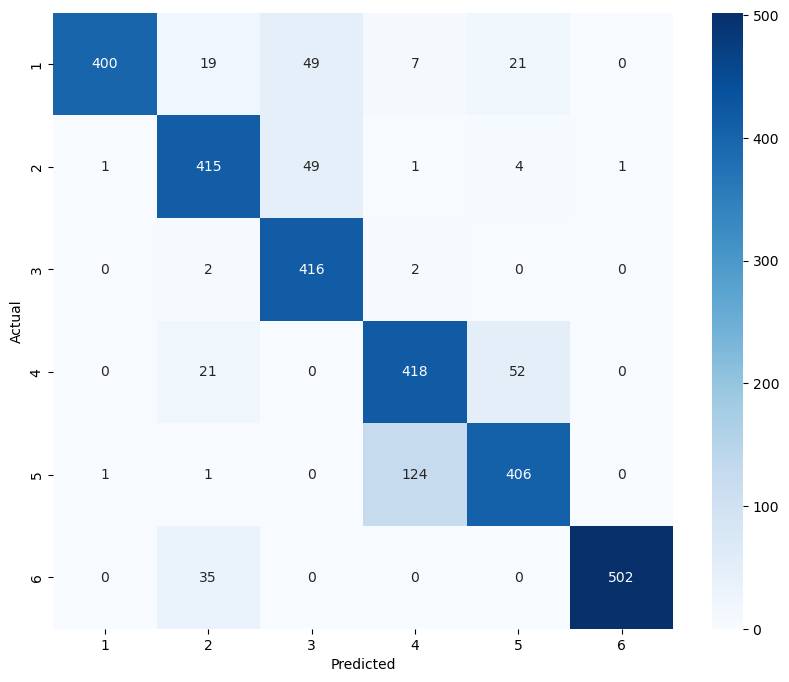

In [23]:
classNames=["1","2","3","4","5","6"]
display_results(testy,predictions,classNames)